### Project overview -  Your task is to take a look at the following datasets provided by Sprocket Central Pty Ltd and identify all data quality issues. Once you've had a look at these datasets, draft an email to the client identifying all data quality issues. 

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
# import excel sheets

df = pd.ExcelFile('KPMG1.xlsx')
df.sheet_names

['Title Sheet',
 'Transactions',
 'NewCustomerList',
 'CustomerDemographic',
 'CustomerAddress']

In [89]:
# assign variable to each sheet

trans = df.parse(1)
newcustlist = df.parse(2)
custdemo = df.parse(3)
custadd = df.parse(4)

# Data Quality and Completeness in preparation for analysis

### Lets begin with the Transactions data sheet

In [52]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               20000 non-null category
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 1.9+ MB


In [51]:
trans['online_order'] = trans['online_order'].astype('category')

- 
### Incomplete fields

In [12]:
trans.describe()

transaction_id   product_id   customer_id  online_order    list_price  \
count    20000.000000  20000.00000  20000.000000  19640.000000  20000.000000   
mean     10000.500000     45.36465   1738.246050      0.500458   1107.829449   
std       5773.647028     30.75359   1011.951046      0.500013    582.825242   
min          1.000000      0.00000      1.000000      0.000000     12.010000   
25%       5000.750000     18.00000    857.750000      0.000000    575.270000   
50%      10000.500000     44.00000   1736.000000      1.000000   1163.890000   
75%      15000.250000     72.00000   2613.000000      1.000000   1635.300000   
max      20000.000000    100.00000   5034.000000      1.000000   2091.470000   

       standard_cost  product_first_sold_date  
count   19803.000000             19803.000000  
mean      556.046951             38199.776549  
std       405.955660              2875.201110  
min         7.210000             33259.000000  
25%       215.140000             35667.000000  
50%       507.580000             38216.000000  
75%       795.100000             40672.000000  
max      1759.850000             42710.000000

In [19]:
# number of unique users and other features
trans.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [21]:
# check for duplicates 
trans.duplicated().sum()

0

In [22]:
# check for null values
trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

- 
### As we can see from the above, we have some null values in the data.

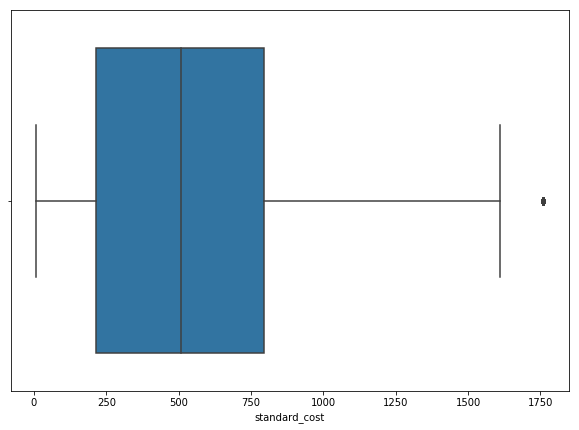

In [40]:
plt.figure(figsize=(10,7))
sb.boxplot(x=trans['standard_cost']);

- 
### This explains we have some outliers we have to look into.

In [41]:
Q1 = trans.quantile(0.25)
Q3 = trans.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

transaction_id             9999.50
product_id                   54.00
customer_id                1755.25
online_order                  1.00
list_price                 1060.03
standard_cost               579.96
product_first_sold_date    5005.00
dtype: float64


In [ ]:
# print(trans < (Q1 - 1.5 * IQR)) |(trans > (Q3 + 1.5 * IQR))

## Lets have a look at the data sheet NewCustomerList

In [90]:
newcustlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
address                                1000 non-null object
postcode                               1000 non-null int64
state                                  1000 non-null object
country                                1000 non-null 

- 
### Incomplete fields

In [91]:
# remove columns as index base 
newcustlist.drop(newcustlist.columns[16:21], axis = 1, inplace = True) 

In [92]:
newcustlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
address                                1000 non-null object
postcode                               1000 non-null int64
state                                  1000 non-null object
country                                1000 non-null 

In [93]:
newcustlist.head()

first_name   last_name  gender  past_3_years_bike_related_purchases  \
0    Marinna    Kauschke  Female                                   21   
1       Olia   O' Mullan  Female                                   77   
2   Brigitte    Whellams  Female                                   67   
3        Ivy        Farr  Female                                   56   
4   Beverlee  Ungerechts  Female                                   49   

         DOB                       job_title job_industry_category  \
0 1973-03-15                 Sales Associate    Financial Services   
1 1973-03-24               Account Executive                Health   
2 1973-05-09  Payment Adjustment Coordinator                   NaN   
3 1973-07-03             Office Assistant IV                    IT   
4 1973-10-03                  Civil Engineer         Manufacturing   

      wealth_segment deceased_indicator owns_car  tenure  \
0  Affluent Customer                  N      Yes       8   
1      Mass Customer                  N       No       8   
2      Mass Customer                  N      Yes      17   
3     High Net Worth                  N       No      19   
4      Mass Customer                  N       No       8   

                address  postcode state    country  property_valuation  Rank  \
0      9 Forster Circle      3174   VIC  Australia                   3   595   
1  6315 Mendota Parkway      2263   NSW  Australia                   7   904   
2      77785 Veith Lane      2766   NSW  Australia                   8   188   
3  08470 Kingsford Lane      2120   NSW  Australia                  11   530   
4      602 Toban Center      4020   QLD  Australia                   7   617   

      Value  
0  0.775625  
1  0.500000  
2  1.156250  
3  0.828750  
4  0.754375

In [33]:
newcustlist.describe()

past_3_years_bike_related_purchases       tenure     postcode  \
count                          1000.000000  1000.000000  1000.000000   
mean                             49.836000    11.388000  3019.227000   
std                              27.796686     5.037145   848.895767   
min                               0.000000     0.000000  2000.000000   
25%                              26.750000     7.000000  2209.000000   
50%                              51.000000    11.000000  2800.000000   
75%                              72.000000    15.000000  3845.500000   
max                              99.000000    22.000000  4879.000000   

       property_valuation  Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  \
count         1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean             7.397000     0.741420     0.834300     0.937485     0.865931   
std              2.758804     0.203194     0.252425     0.299382     0.284450   
min              1.000000     0.400000     0.400000     0.400000     0.340000   
25%              6.000000     0.570000     0.620000     0.700000     0.635625   
50%              8.000000     0.725000     0.820000     0.906250     0.846875   
75%              9.000000     0.920000     1.025000     1.150000     1.073594   
max             12.000000     1.100000     1.375000     1.703125     1.703125   

       Unnamed: 20         Rank        Value  
count  1000.000000  1000.000000  1000.000000  
mean    246.950000   498.819000     0.881714  
std     157.474632   288.810997     0.293525  
min       1.000000     1.000000     0.340000  
25%     108.750000   250.000000     0.649531  
50%     245.500000   500.000000     0.860000  
75%     371.250000   750.250000     1.075000  
max     971.000000  1000.000000     1.718750

In [94]:
# number of unique users and other features
newcustlist.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Rank                                    324
Value                                   324
dtype: int64

In [95]:
newcustlist['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

- 
### What does the value U represent the data ?

In [84]:
newcustlist.last_name.unique()

array(['Kauschke', "O' Mullan", 'Whellams', 'Farr', 'Ungerechts',
       'Swales', 'Firbanks', 'Ricciardiello', 'Messenger', 'Sissel', nan,
       'Forrester', 'Favelle', 'Glenton', 'Eshmade', 'Gorini', 'MacAdie',
       'Scoles', 'Darthe', 'Eck', 'Foat', 'Crellim', 'Roo', 'Richardson',
       'Beswetherick', 'Ortells', 'Marquiss', 'Friese', 'Roomes',
       'Arnoult', 'Swinford', 'Bentke', 'Maddox', 'Bertot', 'Cleare',
       'Yakubov', 'Starmont', 'Newart', 'Averill', 'Doel', 'Shilstone',
       'Everix', 'Caldes', 'Godleman', 'McReidy', 'Hazart', 'Mertel',
       'McAughtry', 'Bumpas', 'Cobbold', 'Eitter', 'Deeming', 'Disley',
       'Raatz', 'Morison', 'Meininking', 'Pendle', 'Poore', 'Eaken',
       'Booton', 'Meach', 'Wohler', 'Quick', 'Brimilcome', 'Domnick',
       'Gale', 'Alderwick', 'Dunstan', 'Springthorpe', 'McOnie',
       'Olechnowicz', 'Swallwell', 'Windmill', 'Chilcott', 'Issacov',
       'Clampe', 'Saladin', 'Elman', 'Lovett', 'Dwelly', 'Duchant',
       'Hayselden', 

In [54]:
# check for duplicates 
newcustlist.duplicated().sum()

0

In [96]:
# check for null values
newcustlist.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

- 
### As we can see from the above, we have some null values in the data.

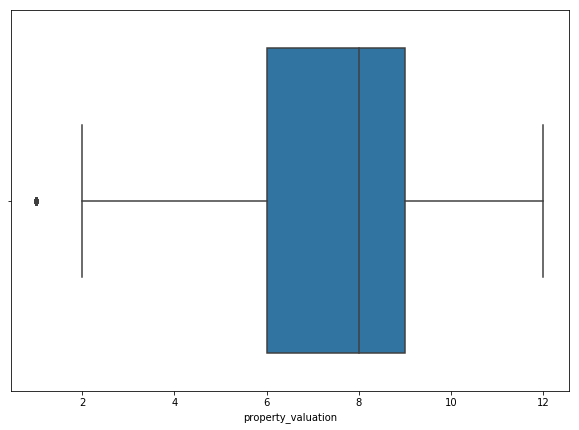

In [97]:
plt.figure(figsize=(10,7))
sb.boxplot(x=newcustlist['property_valuation']);

## Lets have a look at the data sheet CustomerDemographic

In [61]:
custdemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.3+ KB


- 
### Incomplete fields

In [62]:
custdemo.head()

customer_id first_name last_name  gender  \
0          720     Darrel     Canet    Male   
1         1092     Katlin   Creddon  Female   
2         3410    Merrili   Brittin  Female   
3         2413      Abbey    Murrow    Male   
4          658       Donn   Bonnell    Male   

   past_3_years_bike_related_purchases        DOB                 job_title  \
0                                   67 1931-10-23        Recruiting Manager   
1                                   56 1935-08-22        VP Quality Control   
2                                   93 1940-09-22                       NaN   
3                                   27 1943-08-11  Environmental Specialist   
4                                   38 1944-01-24            Tax Accountant   

  job_industry_category     wealth_segment deceased_indicator  \
0                Retail  Affluent Customer                  N   
1                Retail      Mass Customer                  N   
2              Property      Mass Customer                  N   
3         Manufacturing     High Net Worth                  N   
4         Manufacturing  Affluent Customer                  N   

              default owns_car  tenure  
0  1;DROP TABLE users       No     6.0  
1  ì¬íê³¼íì ì´íì°êµ¬ì       No     5.0  
2                   á       No    16.0  
3                  á       Yes    17.0  
4  ì¬íê³¼íì ì´íì°êµ¬ì      Yes     8.0

- 
### Entries in the default feature don't align with the data.
### Date of birth associated with the customer with ID '34' don't add up. It says 1843-12-21 which means he is born 176 years old. 

In [79]:
custdemo['gender'].value_counts()

Female    2037
Male      1872
U           88
M            1
Femal        1
F            1
Name: gender, dtype: int64

- 
### Inconsistent value for the same attribute. We have F, Femal, and Female and M, Male.

In [64]:
custdemo.describe()

customer_id  past_3_years_bike_related_purchases       tenure
count  4000.000000                          4000.000000  3913.000000
mean   2000.500000                            48.890000    10.657041
std    1154.844867                            28.715005     5.660146
min       1.000000                             0.000000     1.000000
25%    1000.750000                            24.000000     6.000000
50%    2000.500000                            48.000000    11.000000
75%    3000.250000                            73.000000    15.000000
max    4000.000000                            99.000000    22.000000

In [65]:
# number of unique users and other features
custdemo.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

In [66]:
# check for duplicates 
custdemo.duplicated().sum()

0

In [67]:
# check for null values
custdemo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

- 
### As we can see from the above, we have some null values in the data.

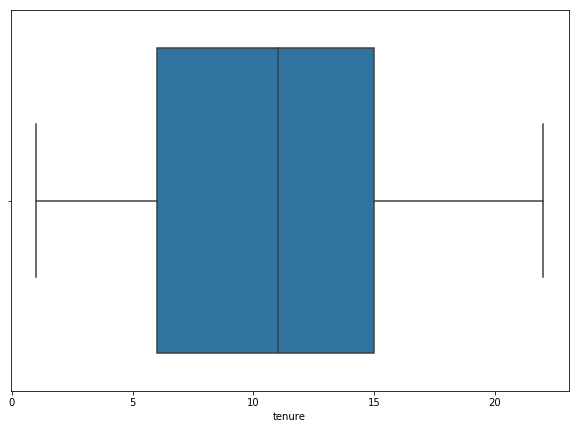

In [68]:
plt.figure(figsize=(10,7))
sb.boxplot(x=custdemo['tenure']);

## Lets have a look at the data sheet CustomerAddress

In [69]:
custadd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
customer_id           3999 non-null int64
address               3999 non-null object
postcode              3999 non-null int64
state                 3999 non-null object
country               3999 non-null object
property_valuation    3999 non-null int64
dtypes: int64(3), object(3)
memory usage: 187.5+ KB


- 
### Complete fields

In [70]:
custadd.head()

customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   
2            4   0 Holy Cross Court      4211              QLD  Australia   
3            5  17979 Del Mar Point      2448  New South Wales  Australia   
4            6     9 Oakridge Court      3216              VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9

In [71]:
custadd.describe()

customer_id     postcode  property_valuation
count  3999.000000  3999.000000         3999.000000
mean   2003.987997  2985.755939            7.514379
std    1154.576912   844.878364            2.824663
min       1.000000  2000.000000            1.000000
25%    1004.500000  2200.000000            6.000000
50%    2004.000000  2768.000000            8.000000
75%    3003.500000  3750.000000           10.000000
max    4003.000000  4883.000000           12.000000

In [72]:
# number of unique users and other features
custadd.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [73]:
# check for duplicates 
custadd.duplicated().sum()

0

In [74]:
# check for null values
custadd.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

- 
### As we can see from the above, we have no null values in the data.

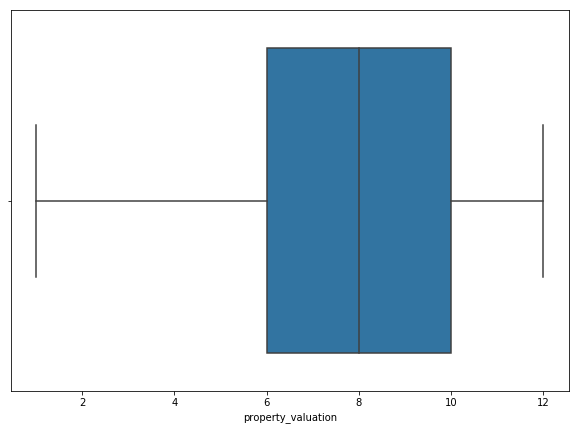

In [75]:
plt.figure(figsize=(10,7))
sb.boxplot(x=custadd['property_valuation']);